# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
sys.path.append('..')  # Add parent directory to the system path
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

In [3]:
cities

['grytviken',
 'lycksele',
 'chui',
 'weno',
 'madinat ash shamal',
 'constantia',
 'port-aux-francais',
 'bilibino',
 'aban',
 'guatrache',
 'avarua',
 'west island',
 'touros',
 'margaret river',
 'georgetown',
 'horta',
 'hermanus',
 'port mathurin',
 'papatowai',
 'taiohae',
 'krasnoslobodsk',
 'turbat',
 'vernon',
 'adamstown',
 'luderitz',
 "port saint john's",
 'kodiak',
 'west end',
 'waitangi',
 'mitu',
 'yellowknife',
 'liuduzhai',
 'kovdor',
 'pendleton',
 'hawaiian paradise park',
 "la'ie",
 'talnakh',
 'vorgashor',
 'blackmans bay',
 'zhanaozen',
 'otra banda',
 'edinburgh of the seven seas',
 'ghanzi',
 'port elizabeth',
 'fort saskatchewan',
 'afaahiti',
 'mokshan',
 'buala',
 'lazaro cardenas',
 'salalah',
 'bikenibeu village',
 'klaksvik',
 'ribeira grande',
 'mostaganem',
 'atafu village',
 'yaren',
 "nar'yan-mar",
 'olonkinbyen',
 'ilulissat',
 'port alfred',
 'colares',
 'zouerate',
 'tralee',
 'inarajan village',
 'alindao',
 'albany',
 'tiksi',
 'margate',
 'badge

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | lycksele
Processing Record 3 of Set 1 | chui
Processing Record 4 of Set 1 | weno
Processing Record 5 of Set 1 | madinat ash shamal
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | aban
Processing Record 10 of Set 1 | guatrache
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | horta
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | krasnoslobodsk
Processing Record 22 of Set 1 | tu

Processing Record 42 of Set 4 | vung tau
Processing Record 43 of Set 4 | sault ste. marie
Processing Record 44 of Set 4 | mitsamiouli
Processing Record 45 of Set 4 | white river
Processing Record 46 of Set 4 | siwa oasis
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | kirundo
Processing Record 49 of Set 4 | al mijlad
Processing Record 0 of Set 5 | princeville
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | redwood falls
Processing Record 3 of Set 5 | cestos city
Processing Record 4 of Set 5 | isafjordur
Processing Record 5 of Set 5 | menongue
Processing Record 6 of Set 5 | as sulayyil
Processing Record 7 of Set 5 | neryungri
Processing Record 8 of Set 5 | saudarkrokur
Processing Record 9 of Set 5 | mount pearl
Processing Record 10 of Set 5 | santa ana de yacuma
Processing Record 11 of Set 5 | lompoc
Processing Record 12 of Set 5 | berezovyy
Processing Record 13 of Set 5 | nicoya
Processing Record 14 o

Processing Record 35 of Set 8 | saundatti
Processing Record 36 of Set 8 | dryden
Processing Record 37 of Set 8 | solnechnyy
Processing Record 38 of Set 8 | san andres
Processing Record 39 of Set 8 | enewetak
Processing Record 40 of Set 8 | lau
Processing Record 41 of Set 8 | tarfaya
Processing Record 42 of Set 8 | songea
Processing Record 43 of Set 8 | danjiangkou
Processing Record 44 of Set 8 | dongning
Processing Record 45 of Set 8 | mocajuba
Processing Record 46 of Set 8 | taroa
Processing Record 47 of Set 8 | mont-laurier
Processing Record 48 of Set 8 | lamu
Processing Record 49 of Set 8 | queenstown
Processing Record 0 of Set 9 | urzhar
Processing Record 1 of Set 9 | at taraf
Processing Record 2 of Set 9 | farasan
Processing Record 3 of Set 9 | rabo de peixe
Processing Record 4 of Set 9 | jindabyne
Processing Record 5 of Set 9 | al muwayh
Processing Record 6 of Set 9 | maloyaroslavets
Processing Record 7 of Set 9 | macusani
Processing Record 8 of Set 9 | donaghadee
Processing Reco

Processing Record 28 of Set 12 | salinas
Processing Record 29 of Set 12 | waiuku
Processing Record 30 of Set 12 | alotau
City not found. Skipping...
Processing Record 31 of Set 12 | reggane
Processing Record 32 of Set 12 | rudbar
Processing Record 33 of Set 12 | palmer
Processing Record 34 of Set 12 | swift current
Processing Record 35 of Set 12 | tsiombe
Processing Record 36 of Set 12 | machico
Processing Record 37 of Set 12 | hailar
Processing Record 38 of Set 12 | pahrump
Processing Record 39 of Set 12 | taytay
Processing Record 40 of Set 12 | deqen
Processing Record 41 of Set 12 | skovorodino
Processing Record 42 of Set 12 | gargalianoi
Processing Record 43 of Set 12 | fauske
Processing Record 44 of Set 12 | qiziltepa
Processing Record 45 of Set 12 | tando bago
Processing Record 46 of Set 12 | laguna
Processing Record 47 of Set 12 | amarante do maranhao
Processing Record 48 of Set 12 | nouadhibou
Processing Record 49 of Set 12 | copala
Processing Record 0 of Set 13 | banjar
Process

In [5]:
from pprint import pprint
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -27.4524, 'lon': 23.4325},
 'dt': 1681873259,
 'id': 986134,
 'main': {'feels_like': 12.3,
          'grnd_level': 874,
          'humidity': 34,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 13.96,
          'temp_max': 13.96,
          'temp_min': 13.96},
 'name': 'Kuruman',
 'sys': {'country': 'ZA', 'sunrise': 1681879484, 'sunset': 1681920350},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 88, 'gust': 4.8, 'speed': 4.24}}


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.09,96,100,0.65,GS,1681873011
1,lycksele,64.5954,18.6735,-3.07,93,98,1.03,SE,1681873012
2,chui,-33.6971,-53.4616,11.18,65,48,5.77,UY,1681873012
3,weno,7.4515,151.8468,27.74,78,100,6.69,FM,1681873012
4,madinat ash shamal,26.1293,51.2009,23.84,47,99,2.76,QA,1681873013


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.09,96,100,0.65,GS,1681873011
1,lycksele,64.5954,18.6735,-3.07,93,98,1.03,SE,1681873012
2,chui,-33.6971,-53.4616,11.18,65,48,5.77,UY,1681873012
3,weno,7.4515,151.8468,27.74,78,100,6.69,FM,1681873012
4,madinat ash shamal,26.1293,51.2009,23.84,47,99,2.76,QA,1681873013


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

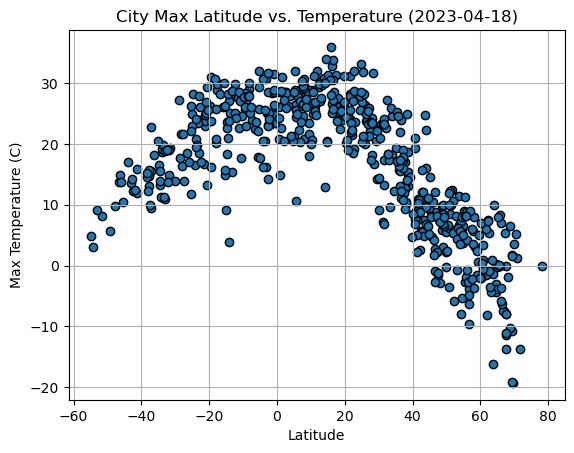

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
from datetime import date

today = date.today()
#convert the date to a string format using the strftime()
date_str = today.strftime("%Y-%m-%d")
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Max Temp'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({date_str})')
plt.grid()
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

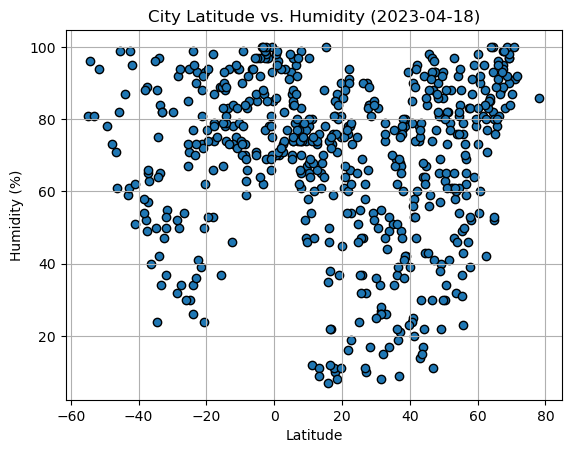

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Humidity'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date_str})')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

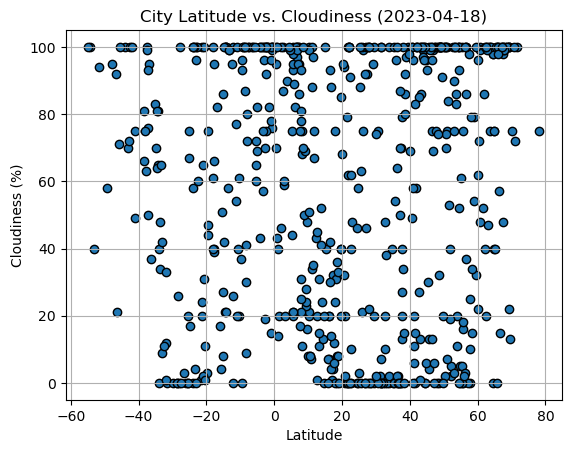

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Cloudiness'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date_str})')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

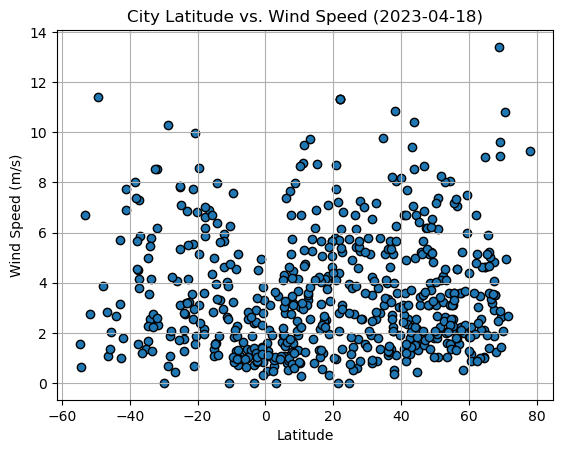

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Wind Speed'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date_str})')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Calculate the slope, intercept, r-value, p-value, and standard error of the regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line using the slope and intercept
    regress_values = slope * x_values + intercept

    # Create a scatter plot of x and y values
    plt.scatter(x_values, y_values)

    # Plot the regression line on the same plot
    plt.plot(x_values, regress_values, "r")

    # Add title, x-axis label, y-axis label, and text label for the equation of the line
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", text_coordinates, fontsize=15, color="red")
    
    # Print the r-squared value
    print(f"The r-squared value is: {round(rvalue**2, 2)}")
   
    
    # Show the plot
    plt.show()


# x_values = np.array(x_values)


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lycksele,64.5954,18.6735,-3.07,93,98,1.03,SE,1681873012
3,weno,7.4515,151.8468,27.74,78,100,6.69,FM,1681873012
4,madinat ash shamal,26.1293,51.2009,23.84,47,99,2.76,QA,1681873013
5,constantia,44.1833,28.6500,10.39,92,100,4.97,RO,1681872863
7,bilibino,68.0546,166.4372,-1.84,83,100,1.22,RU,1681873014


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.09,96,100,0.65,GS,1681873011
2,chui,-33.6971,-53.4616,11.18,65,48,5.77,UY,1681873012
6,port-aux-francais,-49.3500,70.2167,5.75,78,58,11.42,TF,1681873013
9,guatrache,-37.6678,-63.5302,14.74,49,100,4.50,AR,1681873015
10,avarua,-21.2078,-159.7750,23.03,88,100,7.72,CK,1681873015


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.78


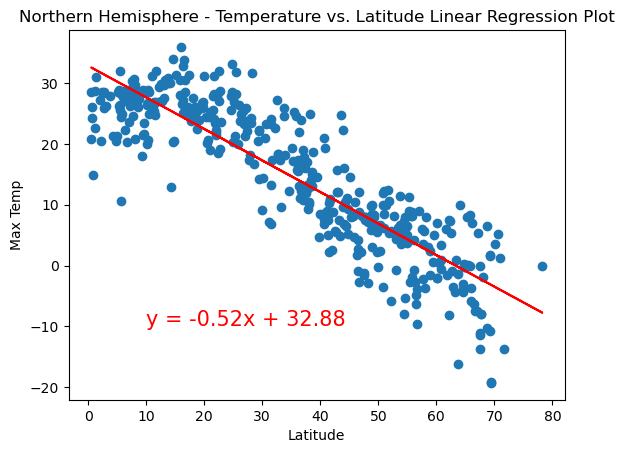

In [30]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Max Temp'], 
                       'Northern Hemisphere - Temperature vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Max Temp', 
                       (10,-10))

The r-squared value is: 0.49


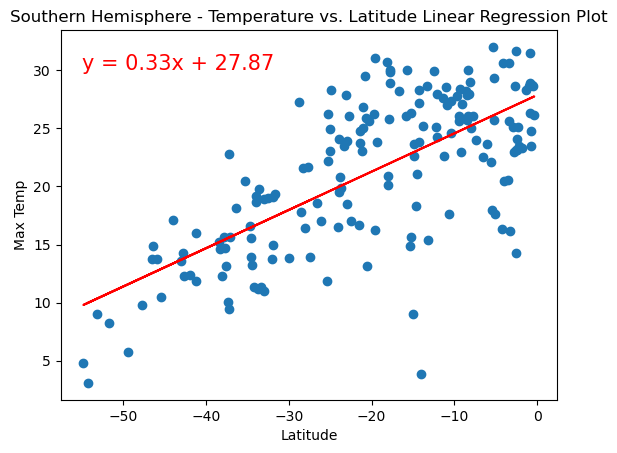

In [31]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Max Temp'], 
                       'Southern Hemisphere - Temperature vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Max Temp', 
                       (-55,30))

**Discussion about the linear relationship:** These regression equations suggest that there is a strong linear relationship between maximum temperature and latitude in both the Northern Hemisphere and Southern Hemisphere.

For the Northern Hemisphere, the regression equation y=-0.52x+32.88 indicates that, on average, maximum temperature decreases by 0.52 degrees Celsius for every one-degree increase in latitude as we move further away from the equator towards the North Pole. The relatively high intercept of 32.88 suggests that even at the lowest latitudes in the Northern Hemisphere, the average maximum temperature is likely to be around 33 degrees Celsius.

For the Southern Hemisphere, the regression equation y=0.33x+27.87 indicates that, on average, maximum temperature increases by 0.33 degrees Celsius for every one-degree increase in latitude as we move closer to the equator from the South Pole. The relatively low intercept of 27.87 suggests that even at the highest latitudes in the Southern Hemisphere, the average maximum temperature is likely to be around 28 degrees Celsius.

These regression equations suggest that latitude is a strong predictor of maximum temperature in both hemispheres, with temperatures decreasing as we move further away from the equator towards the poles in the Northern Hemisphere and increasing as we move closer to the equator from the South Pole in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.01


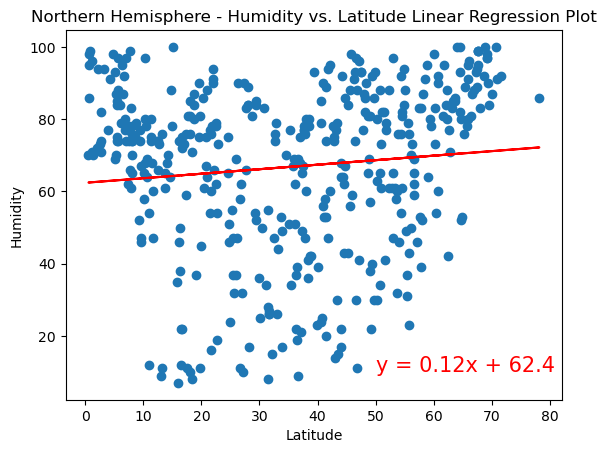

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Humidity'], 
                       'Northern Hemisphere - Humidity vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Humidity', 
                       (50,10))

The r-squared value is: 0.08


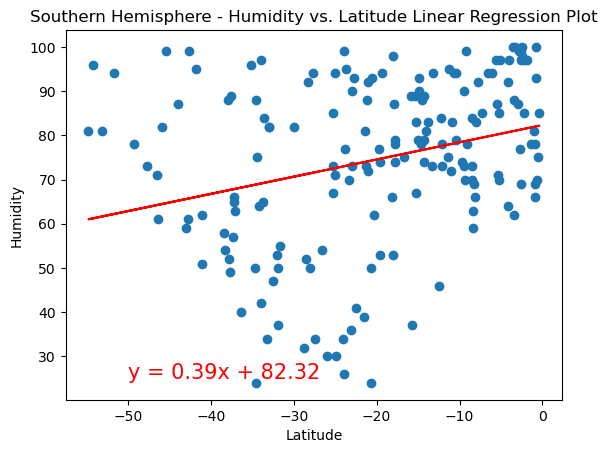

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Humidity'], 
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Humidity', 
                       (-50,25))

**Discussion about the linear relationship:** These regression equations suggest that there is a positive linear relationship between humidity and latitude in the Southern Hemisphere, and a weak positive linear relationship in the Northern Hemisphere.

For the Southern Hemisphere, the regression equation y=0.39x+82.32 indicates that, on average, humidity increases by 0.39 percentage points for every one-degree increase in latitude as we move closer to the equator from the South Pole. The relatively high intercept of 82.32 suggests that even at the lowest latitudes in the Southern Hemisphere, the average humidity is likely to be around 82%.

For the Northern Hemisphere, the regression equation y=0.12x+62.64 indicates that, on average, humidity increases by 0.12 percentage points for every one-degree increase in latitude as we move closer to the North Pole. However, the low slope and the relatively high intercept of 62.64 suggest that the relationship between latitude and humidity in the Northern Hemisphere is weak, and that other factors besides latitude may have a stronger influence on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.02


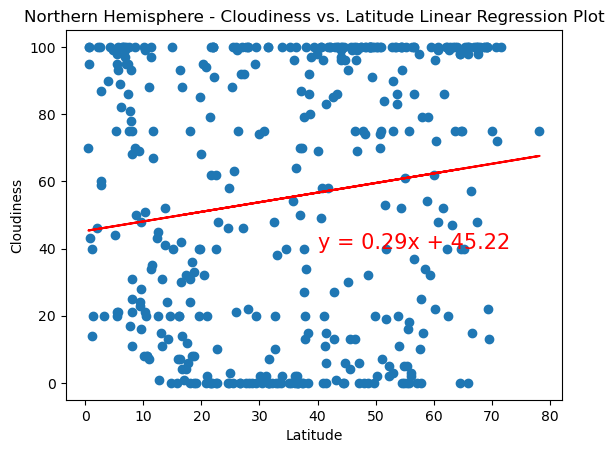

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Cloudiness'], 
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Cloudiness', 
                       (40,40))

The r-squared value is: 0.02


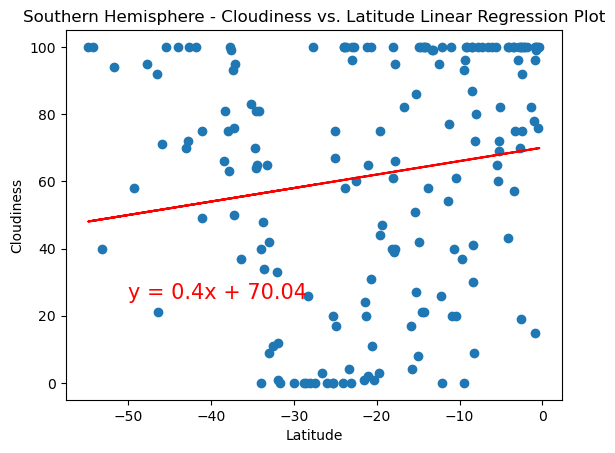

In [35]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Cloudiness'], 
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Cloudiness', 
                       (-50,25))

**Discussion about the linear relationship:** These regression equations suggest that there is a positive linear relationship between cloudiness and latitude in both the Northern Hemisphere and Southern Hemisphere, although the relationship appears to be slightly stronger in the Southern Hemisphere.

For the Southern Hemisphere, the regression equation y=0.4x+70.4 indicates that, on average, cloudiness increases by 0.4 percentage points for every one-degree increase in latitude as we move closer to the equator from the South Pole. The relatively high intercept of 70.4 suggests that even at the lowest latitudes in the Southern Hemisphere, the average cloudiness is likely to be around 70%.

For the Northern Hemisphere, the regression equation y=0.29x+45.22 indicates that, on average, cloudiness increases by 0.29 percentage points for every one-degree increase in latitude as we move closer to the North Pole. The slope of the regression line is lower than that of the Southern Hemisphere regression line, suggesting that the relationship between cloudiness and latitude in the Northern Hemisphere is weaker. However, the relatively low intercept of 45.22 suggests that cloudiness levels may be lower overall in the Northern Hemisphere compared to the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.01


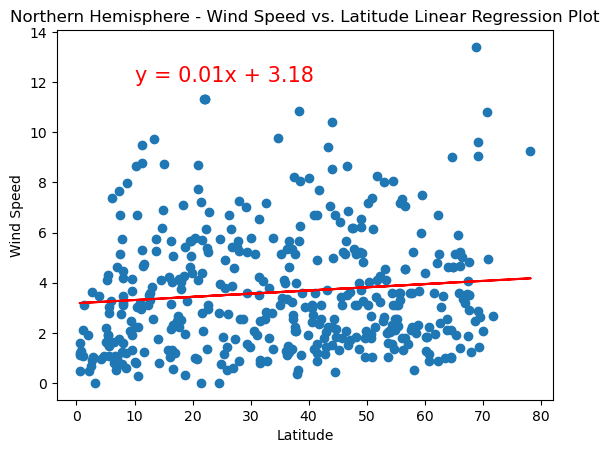

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Wind Speed'], 
                       'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Wind Speed', 
                       (10,12))

The r-squared value is: 0.08


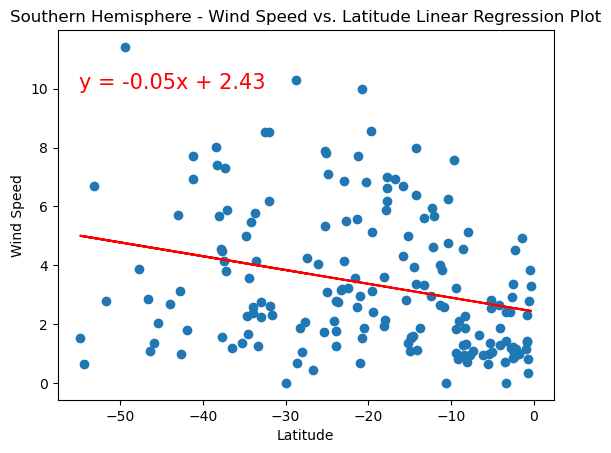

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Wind Speed'], 
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Wind Speed', 
                       (-55,10))

**Discussion about the linear relationship:** These regression equations suggest that there is a weak or no linear relationship between wind speed and latitude in both the Northern Hemisphere and Southern Hemisphere.

For the Northern Hemisphere, the regression equation y=0.01x+3.18 indicates that, on average, wind speed increases by 0.01 meters per second for every one-degree increase in latitude as we move closer to the North Pole. The low slope and the relatively low intercept of 3.18 suggest that the relationship between latitude and wind speed in the Northern Hemisphere is weak, and that latitude may not be a strong predictor of wind speed.

For the Southern Hemisphere, the regression equation y=-0.05x+2.43 indicates that, on average, wind speed decreases by 0.05 meters per second for every one-degree increase in latitude as we move closer to the equator from the South Pole. The negative slope of the regression line suggests that wind speed tends to decrease as we move closer to the equator in the Southern Hemisphere. However, the low slope and the relatively low intercept of 2.43 suggest that the relationship between latitude and wind speed in the Southern Hemisphere is also weak.

**Limitations:** It's important to note that while these plots provide some insights into the relationships between these variables and latitude, they do not account for other factors that may affect these variables, such as local geography, climate patterns, and human activity. 